### Aviation Data

Over the past few years , we as Drizzle plane company have been having a drop in profits and raise in losses especially due to the number of old planes within the company.


After careful consideration , I as the data analyst of the firm had to come up with a proposal especially affter careful consideration through the National Transportation Safety Board ,I was granted access to data containing the number of accidents new and technologized planes have undergone and in which parts of the country are affected by this.


Some of the reasons why this is good informattion is because most of the decision comes from careful analysation of the data provided. We may come up with different plane types to consider for purchase especially if we are planning to change the rate at which the company impacts the society.


Inorder for us to come up with a clear cosideration and proposal for the stakeholders ,we have to go through and visualize through the data provided. For this to start, we have to first load the data from the main source and clean it thourougly then finally ccome up with different visualizations that will aid in the passing of the proposal.

In [1]:
#Step 1 is loading the packages that will help in coming up with the proposal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now that we have loaded the packages to process the data given to us , we can now open the files and check the dataset structure for both

In [2]:
#We have loaded the first document (AviationData) as a dataset called df_aviationdata.
df_aviationdata = pd.read_csv('AviationData.csv',encoding = 'latin1',low_memory=False)


# Now that both datasets are loaded into our working area , we can now check the validity and shape of the datasets to confirm its eligibility within the work environment

We can check the order at which both datasets are loaded using head() attribute and the shape() attribute to also confirm validity

In [3]:
# Now that we have both data structures well confirmed and verrified for continuation, we will proceed to data cleaning.
df_aviationdata.head()

,Unnamed: 0,Unnamed: 0.1,Investigation.Type,Accident.Number,Event.Date,Country,Aircraft.Category,Make,Model,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,US_State
0,0,0,Accident,SEA87LA080,1948-10-24,United States,Unknown,Stinson,108-3,No,2.0,0.000000,0.0,0.0,UNK,"MOOSE CREEK, ID"
1,1,1,Accident,LAX94LA336,1962-07-19,United States,Unknown,Piper,PA24-180,No,4.0,0.000000,0.0,0.0,UNK,"BRIDGEPORT, CA"
2,2,2,Accident,NYC07LA005,1974-08-30,United States,Unknown,Cessna,172M,No,3.0,0.279881,0.0,1.0,IMC,"Saltville, VA"
3,3,3,Accident,LAX96LA321,1977-06-19,United States,Unknown,Rockwell,112,No,2.0,0.000000,0.0,0.0,IMC,"EUREKA, CA"
4,4,4,Accident,CHI79FA064,1979-08-02,United States,Unknown,Cessna,501,No,1.0,2.000000,0.0,0.0,VMC,"Canton, OH"


## DATA UNDERSTANDING

To clearly understand what this data entails , we have to go through it step by step.First step is to check the type of data present in the US_codes dataset first then move to the aviation_data dataset.

In [4]:
#checking the original shape of the aviation data dataset
df_aviationdata.shape

(88889, 16)

We also have to check the information provided in both datasets . We can do this in two different lines to understand the two.


In [5]:
df_aviationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              88889 non-null  int64  
 1   Unnamed: 0.1            88889 non-null  int64  
 2   Investigation.Type      88889 non-null  object 
 3   Accident.Number         88889 non-null  object 
 4   Event.Date              88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Aircraft.Category       88889 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Total.Fatal.Injuries    88889 non-null  float64
 11  Total.Serious.Injuries  88889 non-null  float64
 12  Total.Minor.Injuries    88889 non-null  float64
 13  Total.Uninjured         88889 non-null  float64
 14  Weather.Condition       88889 non-null

Now that we have all information regarding the datasets , we can now move to copying the datasets and choosing specific columns to aid in our data presentation

After checking the values , we can now determine that both indexes/columns would be required for the cleaning of data .

In [6]:
#check columns present in df_aviation data and choose specific columns for manipulation
df_aviationdata.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Investigation.Type', 'Accident.Number',
       'Event.Date', 'Country', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'US_State'],
      dtype='object')

In [7]:
df2 = df_aviationdata.copy()

In [8]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,Investigation.Type,Accident.Number,Event.Date,Country,Aircraft.Category,Make,Model,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,US_State
0,0,0,Accident,SEA87LA080,1948-10-24,United States,Unknown,Stinson,108-3,No,2.0,0.000000,0.0,0.0,UNK,"MOOSE CREEK, ID"
1,1,1,Accident,LAX94LA336,1962-07-19,United States,Unknown,Piper,PA24-180,No,4.0,0.000000,0.0,0.0,UNK,"BRIDGEPORT, CA"
2,2,2,Accident,NYC07LA005,1974-08-30,United States,Unknown,Cessna,172M,No,3.0,0.279881,0.0,1.0,IMC,"Saltville, VA"
3,3,3,Accident,LAX96LA321,1977-06-19,United States,Unknown,Rockwell,112,No,2.0,0.000000,0.0,0.0,IMC,"EUREKA, CA"
4,4,4,Accident,CHI79FA064,1979-08-02,United States,Unknown,Cessna,501,No,1.0,2.000000,0.0,0.0,VMC,"Canton, OH"


In [9]:
df2.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Aircraft.Category           0
Make                       63
Model                      92
Amateur.Built             102
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
US_State                    0
dtype: int64

In [10]:
df2

,Unnamed: 0,Unnamed: 0.1,Investigation.Type,Accident.Number,Event.Date,Country,Aircraft.Category,Make,Model,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,US_State
0,0,0,Accident,SEA87LA080,1948-10-24,United States,Unknown,Stinson,108-3,No,2.0,0.000000,0.0,0.0,UNK,"MOOSE CREEK, ID"
1,1,1,Accident,LAX94LA336,1962-07-19,United States,Unknown,Piper,PA24-180,No,4.0,0.000000,0.0,0.0,UNK,"BRIDGEPORT, CA"
2,2,2,Accident,NYC07LA005,1974-08-30,United States,Unknown,Cessna,172M,No,3.0,0.279881,0.0,1.0,IMC,"Saltville, VA"
3,3,3,Accident,LAX96LA321,1977-06-19,United States,Unknown,Rockwell,112,No,2.0,0.000000,0.0,0.0,IMC,"EUREKA, CA"
4,4,4,Accident,CHI79FA064,1979-08-02,United States,Unknown,Cessna,501,No,1.0,2.000000,0.0,0.0,VMC,"Canton, OH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,88884,88884,Accident,ERA23LA093,2022-12-26,United States,Unknown,PIPER,PA-28-151,No,0.0,1.000000,0.0,0.0,Unknown,"Annapolis, MD"
88885,88885,88885,Accident,ERA23LA095,2022-12-26,United States,Unknown,BELLANCA,7ECA,No,0.0,0.000000,0.0,0.0,Unknown,"Hampton, NH"
88886,88886,88886,Accident,WPR23LA075,2022-12-26,United States,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,0.0,0.000000,0.0,1.0,VMC,"Payson, AZ"
88887,88887,88887,Accident,WPR23LA076,2022-12-26,United States,Unknown,CESSNA,210N,No,0.0,0.000000,0.0,0.0,Unknown,"Morgan, UT"


In [11]:
#dropping the columns(due to them being already dropped an error keeps coming up)
#df2.drop(['Airport.Code','Airport.Name'],axis=1)
#df2

In [12]:
#now we can deal with the categorical null values
df2['Aircraft.Category'].unique()

array(['Unknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [13]:
df2['Aircraft.Category'].isnull().sum()

0

In [14]:
df2['Aircraft.Category'].fillna('Unknown',inplace=True)
df2

,Unnamed: 0,Unnamed: 0.1,Investigation.Type,Accident.Number,Event.Date,Country,Aircraft.Category,Make,Model,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,US_State
0,0,0,Accident,SEA87LA080,1948-10-24,United States,Unknown,Stinson,108-3,No,2.0,0.000000,0.0,0.0,UNK,"MOOSE CREEK, ID"
1,1,1,Accident,LAX94LA336,1962-07-19,United States,Unknown,Piper,PA24-180,No,4.0,0.000000,0.0,0.0,UNK,"BRIDGEPORT, CA"
2,2,2,Accident,NYC07LA005,1974-08-30,United States,Unknown,Cessna,172M,No,3.0,0.279881,0.0,1.0,IMC,"Saltville, VA"
3,3,3,Accident,LAX96LA321,1977-06-19,United States,Unknown,Rockwell,112,No,2.0,0.000000,0.0,0.0,IMC,"EUREKA, CA"
4,4,4,Accident,CHI79FA064,1979-08-02,United States,Unknown,Cessna,501,No,1.0,2.000000,0.0,0.0,VMC,"Canton, OH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,88884,88884,Accident,ERA23LA093,2022-12-26,United States,Unknown,PIPER,PA-28-151,No,0.0,1.000000,0.0,0.0,Unknown,"Annapolis, MD"
88885,88885,88885,Accident,ERA23LA095,2022-12-26,United States,Unknown,BELLANCA,7ECA,No,0.0,0.000000,0.0,0.0,Unknown,"Hampton, NH"
88886,88886,88886,Accident,WPR23LA075,2022-12-26,United States,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,0.0,0.000000,0.0,1.0,VMC,"Payson, AZ"
88887,88887,88887,Accident,WPR23LA076,2022-12-26,United States,Unknown,CESSNA,210N,No,0.0,0.000000,0.0,0.0,Unknown,"Morgan, UT"


In [15]:
df2['Aircraft.Category'].unique()

array(['Unknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [16]:
df2.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Aircraft.Category           0
Make                       63
Model                      92
Amateur.Built             102
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
US_State                    0
dtype: int64

In [17]:
df2.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Aircraft.Category           0
Make                       63
Model                      92
Amateur.Built             102
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
US_State                    0
dtype: int64

In [18]:
df2['Total.Fatal.Injuries'].fillna(df2['Total.Fatal.Injuries'].mean(),inplace=True)

In [19]:
df2['Total.Fatal.Injuries'].isnull().sum()

0

In [20]:
df2['Total.Serious.Injuries'].fillna(df2['Total.Serious.Injuries'].mean(),inplace=True)

In [21]:
df2['Total.Minor.Injuries'].fillna(df2['Total.Minor.Injuries'].median(),inplace=True)

In [22]:
df2['Total.Uninjured'].fillna(df2['Total.Uninjured'].median(),inplace=True)

In [23]:
df2['Weather.Condition'].fillna('Unknown',inplace=True)

In [24]:
df2

,Unnamed: 0,Unnamed: 0.1,Investigation.Type,Accident.Number,Event.Date,Country,Aircraft.Category,Make,Model,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,US_State
0,0,0,Accident,SEA87LA080,1948-10-24,United States,Unknown,Stinson,108-3,No,2.0,0.000000,0.0,0.0,UNK,"MOOSE CREEK, ID"
1,1,1,Accident,LAX94LA336,1962-07-19,United States,Unknown,Piper,PA24-180,No,4.0,0.000000,0.0,0.0,UNK,"BRIDGEPORT, CA"
2,2,2,Accident,NYC07LA005,1974-08-30,United States,Unknown,Cessna,172M,No,3.0,0.279881,0.0,1.0,IMC,"Saltville, VA"
3,3,3,Accident,LAX96LA321,1977-06-19,United States,Unknown,Rockwell,112,No,2.0,0.000000,0.0,0.0,IMC,"EUREKA, CA"
4,4,4,Accident,CHI79FA064,1979-08-02,United States,Unknown,Cessna,501,No,1.0,2.000000,0.0,0.0,VMC,"Canton, OH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,88884,88884,Accident,ERA23LA093,2022-12-26,United States,Unknown,PIPER,PA-28-151,No,0.0,1.000000,0.0,0.0,Unknown,"Annapolis, MD"
88885,88885,88885,Accident,ERA23LA095,2022-12-26,United States,Unknown,BELLANCA,7ECA,No,0.0,0.000000,0.0,0.0,Unknown,"Hampton, NH"
88886,88886,88886,Accident,WPR23LA075,2022-12-26,United States,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,0.0,0.000000,0.0,1.0,VMC,"Payson, AZ"
88887,88887,88887,Accident,WPR23LA076,2022-12-26,United States,Unknown,CESSNA,210N,No,0.0,0.000000,0.0,0.0,Unknown,"Morgan, UT"


In [25]:
df2.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Aircraft.Category           0
Make                       63
Model                      92
Amateur.Built             102
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
US_State                    0
dtype: int64

In [26]:
#df2 = df2.drop(['Aircraft.damage','Location','Event.Id'],axis=1)

In [27]:
df2['US_State'].isnull().sum()

0

In [28]:
df2['US_State'].fillna('Unknown',inplace =True)

In [29]:
df2['Country'].fillna('Unknown',inplace =True)

In [30]:
df2['Make'].fillna(df2['Make'].mode(),inplace =True)

In [31]:
df2.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Aircraft.Category           0
Make                       63
Model                      92
Amateur.Built             102
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
US_State                    0
dtype: int64

Now that we have cleared most of the null values in the dataset we can finally move to saving the new dataset as a new and cleaned dataset

In [32]:
df2.to_csv('AviationData.csv', index=True)

In [33]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Investigation.Type', 'Accident.Number',
       'Event.Date', 'Country', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'US_State'],
      dtype='object')

In [34]:
df2.shape

(88889, 16)

In [35]:
corr_df2 = df2.corr()

In [36]:
corr_df2 =corr_df2.fillna(0)

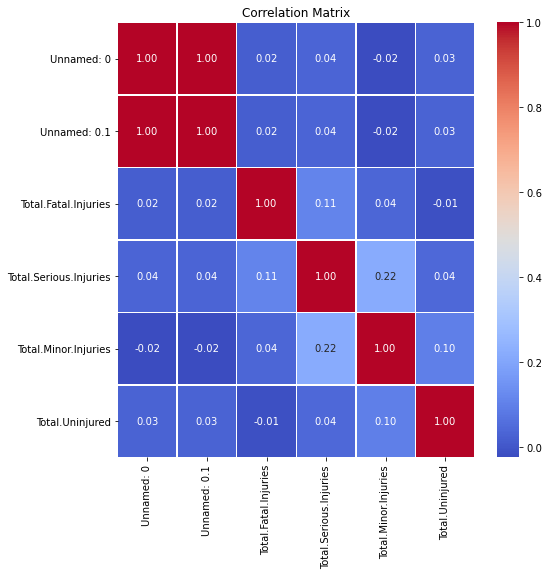

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_df2,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(df2['Aircraft.Category'], df2['Total.Fatal.Injuries'], color='skyblue')
plt.title('Total Fatal injuries by plane category')
#plt.xlabel('Category of Planes')
#plt.ylabel('total fatal injuries')
plt.grid(True)
plt.show()